<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-1/blob/main/8.b.%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

دیتاست MNIST چیست؟

دیتاست MNIST یک دیتاست اعداد دستنویس است. دیتاست MNIST که گاهی دیتابیس امنیست مخفف Modified National Standards and Technology Database گفته می‌شود، زیرمجموعه اصلاح شده‌ای از دیتاست NIST است. یان لکان (Yann LeCun) و کورینا کورتس (Corinna Cortes) و کریستوفر برجس (Christopher Burges) با انتخاب و ترکیب بخشی از NIST این دیتاست را در سال ۱۹۹۸ رسما معرفی کردند.

هر عکس انتخاب شده از NIST طی دو مرحله یک بار در باکس‌ها ۲۰ در ۲۰ پیکسل مرکزیت داده شد و سپس همین باکس‌ها دوباره در باکس‌های ۲۸ در ۲۸ جای گرفتند. همچنین در مرحله دوم، عدد میان هر عکس با محاسبه مرکز ثقل در میانه عکس قرار گرفت.

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [68]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

In [69]:
X.shape

(70000, 784)

In [70]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [72]:
X_train = X[:60000]
X_test  = X[60000:]
y_train = y[:60000]
y_test  = y[60000:]

In [73]:
model = MLPClassifier(hidden_layer_sizes=(50,) , max_iter=100 , alpha=1e-4,solver='sgd', random_state=1
                      , learning_rate_init=.1 , verbose=10 , tol=1e-4)

In [74]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

In [75]:
model.score(X_train, y_train)

1.0

In [76]:
model.score(X_test, y_test)

0.9731

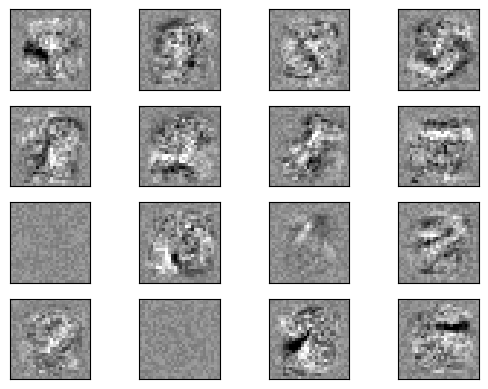

In [77]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin = model.coefs_[0].min()
vmax = model.coefs_[0].max()

for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray , vmin=.5 * vmin , vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())